In [11]:
%matplotlib inline


# 1D Rectilinear Mesh


In [2]:
from geobipy import StatArray
from geobipy import RectilinearMesh1D
import matplotlib.pyplot as plt
import numpy as np

Instantiate a new 1D rectilinear mesh by specifying cell centres or edges.
Here we use edges



In [3]:
x = StatArray(np.cumsum(np.arange(0.0, 10.0)), 'Depth', 'm')

### Instantiate by specifying edges

In [4]:
rm = RectilinearMesh1D(edges=x, relativeTo=10.0)

done


In [5]:
rm.relativeTo

StatArray([10.])

In [39]:
print(rm.centres)

[ 0.5  2.   4.5  8.  12.5 18.  24.5 32.  40.5]


In [40]:
print(rm.edges)

[ 0.  1.  3.  6. 10. 15. 21. 28. 36. 45.]


In [41]:
print(rm.internaledges)

[ 1.  3.  6. 10. 15. 21. 28. 36.]


In [42]:
print(rm.widths)

[1. 2. 3. 4. 5. 6. 7. 8. 9.]


Get the cell indices



In [43]:
print(rm.edges_absolute)

a [ 0.  1.  3.  6. 10. 15. 21. 28. 36. 45.]
[10. 11. 13. 16. 20. 25. 31. 38. 46. 55.]


In [44]:
print(rm.cellIndex(np.r_[1.0, 5.0, 20.0]))

[-1 -1  4]


We can plot the grid of the mesh



a [ 0.  1.  3.  6. 10. 15. 21. 28. 36. 45.]
a [ 0.  1.  3.  6. 10. 15. 21. 28. 36. 45.]


<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


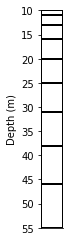

In [45]:
plt.figure()
_ = rm.plotGrid(transpose=True, flip=True)

Or Pcolor the mesh showing. An array of cell values is used as the colour.



a [ 0.  1.  3.  6. 10. 15. 21. 28. 36. 45.]


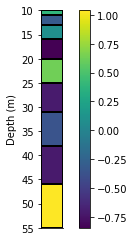

In [46]:
plt.figure()
arr = StatArray(np.random.randn(rm.nCells.value), "Name", "Units")
_ = rm.pcolor(arr, grid=True, flip=True, transpose=True)

In [ ]:
# Widths

In [18]:
rm = RectilinearMesh1D(widths=np.full(10, fill_value=10), relativeTo=10.0)

setting widths
[10 10 10 10 10 10 10 10 10 10]
done
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
done


In [23]:
rm.

StatArray([10., 10., 10., 10., 10., 10., 10., 10., 10.])

Instantiate a new 1D rectilinear mesh by specifying cell centres or edges.
Here we use edges



In [20]:
x = StatArray(np.logspace(-3, 3, 10), 'Depth', 'm')

In [21]:
rm = RectilinearMesh1D(edges=x, log=10)

setting edges
done


Access property describing the mesh



In [22]:
print(rm.centres)

[-2.66666667e+00 -2.00000000e+00 -1.33333333e+00 -6.66666667e-01
 -2.22044605e-16  6.66666667e-01  1.33333333e+00  2.00000000e+00
  2.66666667e+00]


In [23]:
print(rm.edges)

[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]


In [24]:
print(rm.internaledges)

[-2.33333333 -1.66666667 -1.         -0.33333333  0.33333333  1.
  1.66666667  2.33333333]


In [25]:
print(rm.widths)

[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667]


Get the cell indices



In [26]:
print(rm.cellIndex(np.r_[0.03, 5.0, 200.0]))

[2 5 7]


We can plot the grid of the mesh



In [ ]:
plt.figure()
_ = rm.plotGrid(flipY=True)

Or Pcolor the mesh showing. An array of cell values is used as the colour.



In [ ]:
plt.figure()
arr = StatArray(np.random.randn(rm.nCells), "Name", "Units")
_ = rm.pcolor(arr, grid=True, flipY=True)


import h5py
with h5py.File('rm1d.h5', 'w') as f:
    rm.toHdf(f, 'rm1d')

with h5py.File('rm1d.h5', 'r') as f:
    rm1 = RectilinearMesh1D().fromHdf(f['rm1d'])